# Escalonamento de Features

Dados compostos por atributos com valores em diferentes ordens de grandeza podem afetar negativamente o desempenho de algoritmos de aprendizado de máquina como:

- kNN com distância euclidiana
- Logistic regression, SVM, Perceptrons e Redes Neurais
- K-means
- Linear discriminant analysis (LDA), principal component analysis (PCA), kernel PCA.

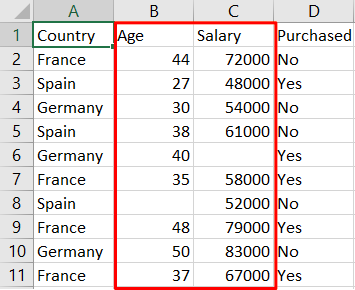

Algoritmos não afetados pelo escalonamento de features: 
- Naive Bayes 
- Modelos baseados em árvore como árvores de decisão, Random Forest e Gradient Boosting

Desse modo é frequentemente útil realizar transformações de modo que as features possam ter valores com ordens de grandeza semelhantes, em outras palavras, com escalas semelhantes.

Duas técnicas bastante usadas para deixar as features com escalas semelhantes são:
- Normalização (*Normalization*)
- Padronização (*Standardization*)

**IMPORTANTE:** O ajuste (*fit*) deve ser realizado sobre o conjunto de treino, mas a transformação deve ocorrer sobre ambos os conjuntos, ou seja, treino e teste.

In [2]:
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import neighbors 
from sklearn import linear_model
from sklearn import svm
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
X, y = datasets.load_breast_cancer(return_X_y=True)
X.shape, y.shape

((569, 30), (569,))

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Mostrar min, max, média e desvio padrão de cada coluna de X_train e X_test

In [5]:
df_train = pd.DataFrame(X_train).describe().loc[['min', 'max', 'mean', 'std']]
df_train

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
min,7.691000,9.710000,48.340000,170.400000,0.062510,0.019380,0.000000,0.000000,0.116700,0.049960,...,8.678000,12.020000,54.490000,223.600000,0.081250,0.034320,0.000000,0.000000,0.156500,0.055040
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.311400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.218400,0.937900,0.903400,0.275600,0.663800,0.173000
mean,14.176078,19.159171,92.256332,659.770854,0.095962,0.103303,0.088071,0.048440,0.180308,0.062664,...,16.287322,25.505553,107.363844,881.848241,0.131772,0.249086,0.268497,0.113839,0.288300,0.083537
std,3.535730,4.214074,24.289529,358.865452,0.013766,0.051209,0.077836,0.037712,0.026871,0.007248,...,4.799691,6.017564,33.083204,570.753903,0.023023,0.148622,0.196139,0.063886,0.062318,0.017518


In [6]:
df_test = pd.DataFrame(X_test).describe().loc[['min', 'max', 'mean', 'std']]
df_test

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
min,6.981000,10.380000,43.790000,143.500000,0.052630,0.023440,0.000000,0.000000,0.106000,0.050240,...,7.930000,12.490000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156600,0.058650
max,25.220000,31.120000,171.500000,1878.000000,0.137100,0.345400,0.426400,0.184500,0.290600,0.082430,...,32.490000,47.160000,214.000000,3432.000000,0.222600,1.058000,1.252000,0.291000,0.544000,0.207500
mean,14.013743,19.593333,91.300351,643.526901,0.097288,0.106756,0.090495,0.050035,0.183149,0.063109,...,16.226988,26.076784,107.022339,877.638596,0.133757,0.266319,0.280780,0.116392,0.294209,0.084896
std,3.504404,4.494926,24.379154,335.928618,0.014734,0.056452,0.084152,0.041325,0.028621,0.006612,...,4.924410,6.436210,34.879331,567.752161,0.022387,0.175835,0.235532,0.070004,0.060785,0.019287


## Normalização ou escalonamento min-max

- Refere-se ao escalomento de features no intervalo entre 0 e 1.
- Não assume que os dados originais estejam em uma distribuição específica.
- Funciona melhor quando a técnica de standardization não funciona bem.
- Fuciona bem quando a distribuição não for Gaussiana ou se o desvio padrão for muito pequeno.
- É sensível a outliers, portanto, não se recomenda usar quando há outliers nos dados.

$$ x_{i}^{\prime} = \frac{ x_{i} - x_{min} }{ x_{max} - x_{min} } $$

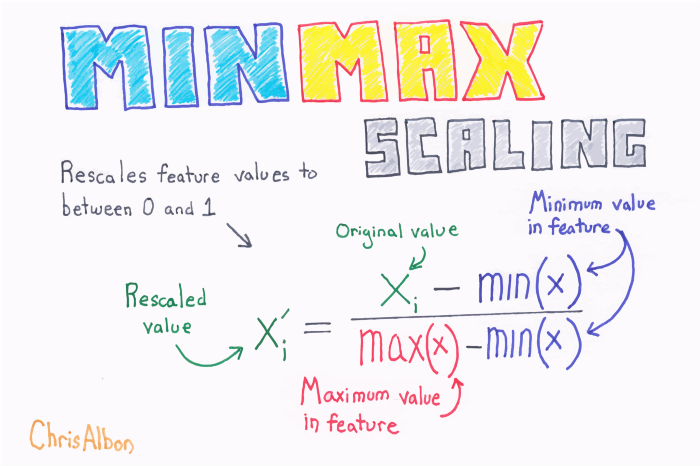

In [7]:
sc_norm = preprocessing.MinMaxScaler()
X_train_norm = sc_norm.fit_transform(X_train)
X_test_norm = sc_norm.transform(X_test)

## Mostrar min, max, média e desvio padrão de cada coluna de X_train_norm e X_test_norm

In [8]:
df_train_norm = pd.DataFrame(X_train_norm).describe().loc[['min', 'max', 'mean', 'std']]
df_train_norm

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
mean,0.317600,0.319553,0.313330,0.209976,0.331567,0.287389,0.206351,0.240754,0.339606,0.267564,...,0.278098,0.359423,0.268791,0.163321,0.368371,0.237683,0.297208,0.413058,0.259806,0.241585
std,0.173159,0.142512,0.173299,0.153980,0.136448,0.175360,0.182371,0.187433,0.143464,0.152659,...,0.175414,0.160383,0.168183,0.141612,0.167868,0.164481,0.217112,0.231805,0.122843,0.148507


In [9]:
df_train[0]

min      7.691000
max     28.110000
mean    14.176078
std      3.535730
Name: 0, dtype: float64

## Comparar histogramas da primeira feature: dataset original x normalizado

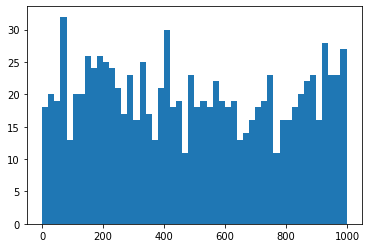

In [10]:
import numpy as np
x_ = np.random.uniform(0, 1000, size=(1000, 1))
plt.hist(x_, bins=50);

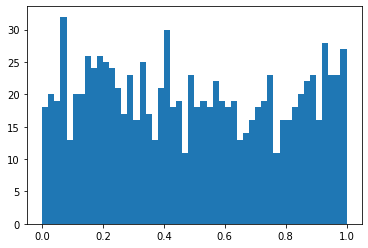

In [11]:
sc_norm = preprocessing.MinMaxScaler()
x_norm = sc_norm.fit_transform(x_)
plt.hist(x_norm, bins=50);

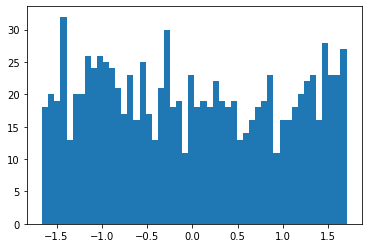

In [12]:
sc_std = preprocessing.StandardScaler()
x_std = sc_std.fit_transform(x_)
plt.hist(x_std, bins=50);

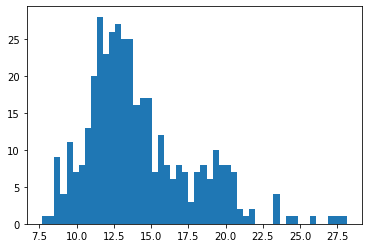

In [13]:
idx = 0
plt.hist(X_train[:, idx], bins=50);

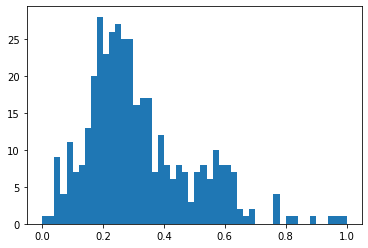

In [14]:
plt.hist(X_train_norm[:, idx], bins=50);

In [15]:
df_test_norm = pd.DataFrame(X_test_norm).describe().loc[['min', 'max', 'mean', 'std']]
df_test_norm

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
min,-0.034772,0.022658,-0.032463,-0.011542,-0.097928,0.013903,0.000000,0.000000,-0.057128,0.005897,...,-0.027337,0.012527,-0.020741,-0.009528,-0.073496,-0.007780,0.000000,0.000000,0.000197,0.030604
max,0.858465,0.724045,0.878710,0.732687,0.739320,1.116430,0.999063,0.916998,0.928457,0.683867,...,0.870258,0.936567,0.810889,0.796050,1.030623,1.132916,1.385876,1.055878,0.763848,1.292472
mean,0.309650,0.334235,0.306509,0.203006,0.344710,0.299214,0.212031,0.248683,0.354771,0.276933,...,0.275893,0.374648,0.267055,0.162276,0.382844,0.256756,0.310803,0.422323,0.271454,0.253106
std,0.171625,0.152010,0.173938,0.144138,0.146039,0.193317,0.197170,0.205391,0.152809,0.139267,...,0.179973,0.171541,0.177313,0.140867,0.163232,0.194598,0.260718,0.254006,0.119821,0.163502


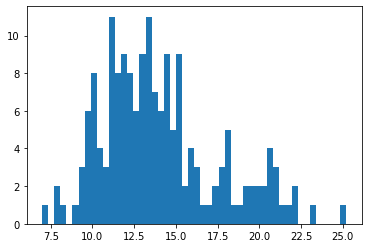

In [16]:
idx = 0
plt.hist(X_test[:, idx], bins=50);

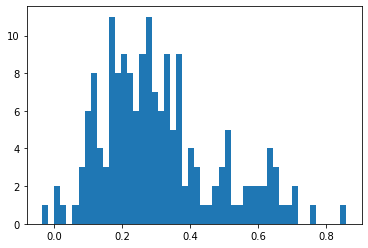

In [17]:
plt.hist(X_test_norm[:, idx], bins=50);

## Padronização ou *Standardization*

- Centraliza a distribuição dos dados no valor 0 e o desvio padrão no valor 1.
- Assume que seus dados estão em uma distribuição normal.
- Melhor usado quando o atributo está em uma distribuição normal ou 
- Gera dados sem limites predefinidos.

$$ x_{i}^{\prime} = \frac{ x_{i} - \mu_x }{ \sigma_x } $$

In [18]:
sc_std = preprocessing.StandardScaler()
X_train_std = sc_std.fit_transform(X_train)
X_test_std = sc_std.transform(X_test)

## Mostrar min, max, média e desvio padrão de cada coluna de X_train_std e X_test_std

In [19]:
df_train_std = pd.DataFrame(X_train_std).describe().loc[['min', 'max', 'mean', 'std']]
df_train_std.round(3)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
min,-1.836,-2.245,-1.810,-1.365,-2.433,-1.641,-1.133,-1.286,-2.370,-1.755,...,-1.587,-2.244,-1.600,-1.155,-2.197,-1.447,-1.371,-1.784,-2.118,-1.629
max,3.946,4.781,3.967,5.137,4.905,4.069,4.357,4.056,4.609,4.804,...,4.121,3.999,4.353,5.916,3.767,4.641,3.241,2.535,6.033,5.113
mean,-0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,...,0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000
std,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,...,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001


In [20]:
df_test_std = pd.DataFrame(X_test_std).describe().loc[['min', 'max', 'mean', 'std']]
df_test_std.round(3)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
min,-2.038,-2.086,-1.998,-1.440,-3.152,-1.562,-1.133,-1.286,-2.769,-1.716,...,-1.743,-2.166,-1.724,-1.222,-2.636,-1.494,-1.371,-1.784,-2.116,-1.422
max,3.127,2.842,3.267,3.399,2.992,4.734,4.352,3.612,4.110,2.730,...,3.380,3.603,3.227,4.474,3.950,5.450,5.021,2.777,4.108,7.085
mean,-0.046,0.103,-0.039,-0.045,0.096,0.068,0.031,0.042,0.106,0.061,...,-0.013,0.095,-0.010,-0.007,0.086,0.116,0.063,0.040,0.095,0.078
std,0.992,1.068,1.005,0.937,1.072,1.104,1.083,1.097,1.066,0.913,...,1.027,1.071,1.056,0.996,0.974,1.185,1.202,1.097,0.977,1.102


## Comparar histogramas da primeira feature: dataset original x standadized

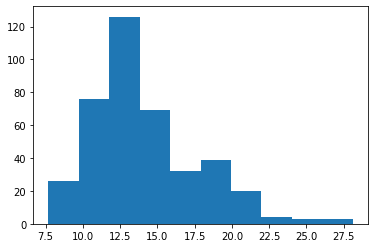

In [21]:
idx = 0
plt.hist(X_train[:, idx], bins=10);

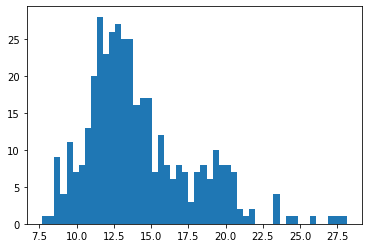

In [20]:
idx = 0
plt.hist(X_train[:, idx], bins=50);

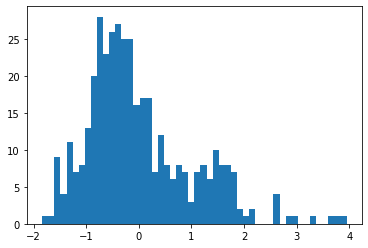

In [21]:
idx = 0
plt.hist(X_train_std[:, idx], bins=50);

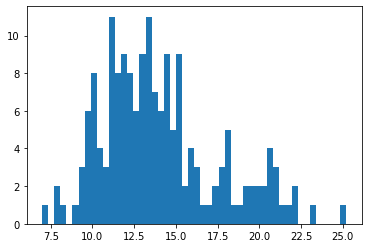

In [22]:
plt.hist(X_test[:, idx], bins=50);

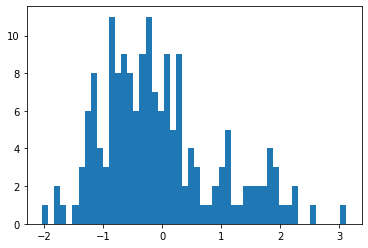

In [23]:
plt.hist(X_test_std[:, idx], bins=50);

## Calcule a acurácia no conjunto de teste (X_test, y_test) usando o classificador SVM

In [24]:
model = svm.SVC(gamma='auto')
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.631578947368421

## Calcule a acurácia no conjunto de teste normalizado (X_test_norm, y_test) usando o classificador SVM

In [25]:
model_norm = svm.SVC(gamma='auto')
model_norm.fit(X_train_norm, y_train)
model_norm.score(X_test_norm, y_test)

0.9473684210526315

## Calcule a acurácia no conjunto de teste standardizado (X_test_std, y_test) usando o classificador SVM

In [26]:
model_std = svm.SVC(gamma='auto')
model_std.fit(X_train_std, y_train)
model_std.score(X_test_std, y_test)

0.9766081871345029